<a href="https://colab.research.google.com/github/Navifra-Denny/01_linear_algebra/blob/main/02.covariance_matrix/jupyter_notebook/cov_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as widgets
from IPython.display import display, clear_output

heights = None
weights = None
cov_matrix = None

In [8]:
def generate_clipped_gaussian(mean, std, min_val, max_val, size):
    data = np.random.normal(mean, std, size)
    # Clip to specified range
    data = np.clip(data, min_val, max_val)
    # Round to 1 decimal place
    return np.round(data, 1)


In [13]:
def generate_and_plot(_=None):  # 버튼 눌렸을 때 실행
    global heights, weights, cov_matrix
    num_samples = sample_slider.value
    height_std = height_std_slider.value
    weight_std = weight_std_slider.value
    heights = generate_clipped_gaussian(170, height_std, 70, 270, num_samples)
    weights = generate_clipped_gaussian(80, weight_std, 20, 140, num_samples)

    # 평균 계산
    height_avg = np.mean(heights)
    weight_avg = np.mean(weights)

    # 중심화
    heights_centered = heights - height_avg
    weights_centered = weights - weight_avg

    # 중심화된 데이터로 공분산 계산
    centered_data = np.vstack((heights_centered, weights_centered))  # shape: (2, n)
    cov_matrix = np.cov(centered_data)

    clear_output(wait=True)

    # 시각화
    plt.figure(figsize=(8, 6))
    plt.scatter(heights, weights, color='skyblue', alpha=0.7, edgecolors='black', label='Data')
    plt.axvline(x=height_avg, color='red', linestyle='--', linewidth=0.5, label=f'Mean Height = {height_avg:.1f}')
    plt.axhline(y=weight_avg, color='red', linestyle='--', linewidth=0.5, label=f'Mean Weight = {weight_avg:.1f}')
    plt.xlabel("Height (cm)")
    plt.ylabel("Weight (kg)")
    plt.title(f"Height vs Weight (Samples = {num_samples})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 공분산 출력
    print("Centered Covariance Matrix:")
    print(cov_matrix)
    print(f"Cov(Height, Weight): {cov_matrix[0, 1]:.2f}")

    # 다시 UI 표시
    display(ui_box)

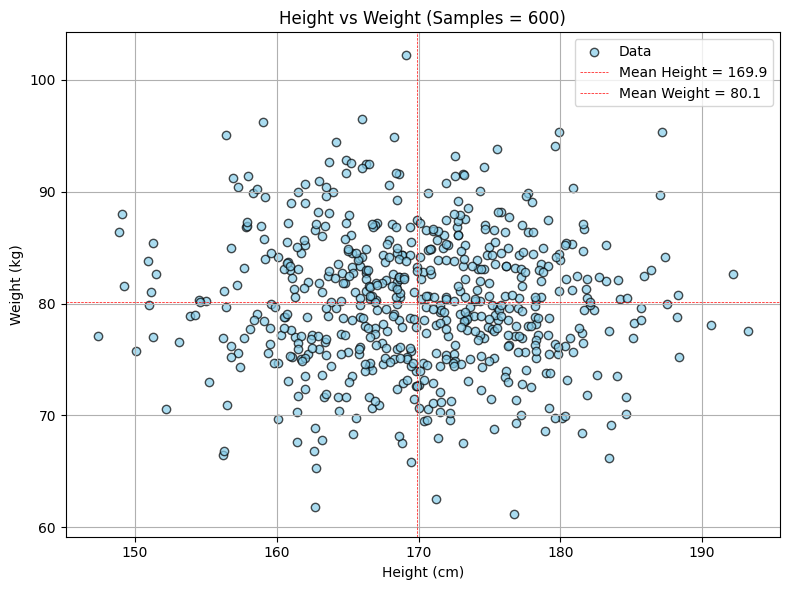

Centered Covariance Matrix:
[[61.94668422 -1.77230726]
 [-1.77230726 37.6375559 ]]
Cov(Height, Weight): -1.77


In [14]:

# ======= 정수 슬라이더 =======
sample_slider = widgets.IntSlider(
    value=300,
    min=50,
    max=1000,
    step=50,
    description='샘플 수:',
    continuous_update=False
)

# ======= float 슬라이더 =======
height_std_slider = widgets.FloatSlider(
    value=3.0,
    min=0.0,
    max=33.0,
    step=1.0,
    description='heights std (m):',
    continuous_update=True
)
# ======= float 슬라이더 =======
weight_std_slider = widgets.FloatSlider(
    value=3.0,
    min=0.0,
    max=20.0,
    step=1.0,
    description='weights std (m):',
    continuous_update=True
)
# ======= 새로 고침 버튼 =======
refresh_button = widgets.Button(description="🔁 새로 고침")
refresh_button.on_click(generate_and_plot)

# ======= UI 묶어서 표시 =======
ui_box = widgets.VBox([sample_slider, height_std_slider, weight_std_slider, refresh_button])
display(ui_box)

# ======= 초기 실행 =======
generate_and_plot()

In [17]:
def visualize_covariance_transform(cov_matrix):
    # 조건1: 단위 원 위에 점 뿌리기 (16개)
    theta = np.linspace(0, 2 * np.pi, 17)
    unit_circle = np.stack((np.cos(theta), np.sin(theta)))  # shape: (2, 16)

    # 조건2: 선형 변환 (공분산 행렬 적용)
    transformed = cov_matrix @ unit_circle  # shape: (2, 16)

    # 조건3: 시각화
    plt.figure(figsize=(6, 6))
    plt.plot(unit_circle[0], unit_circle[1], 'o-', label='Unit Circle (Before)')
    plt.plot(transformed[0], transformed[1], 'o-', label='Transformed (Cov Matrix)')
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.gca().set_aspect('equal')
    plt.title("Linear Transform by Covariance Matrix")
    plt.legend()
    plt.grid(True)
    plt.show()


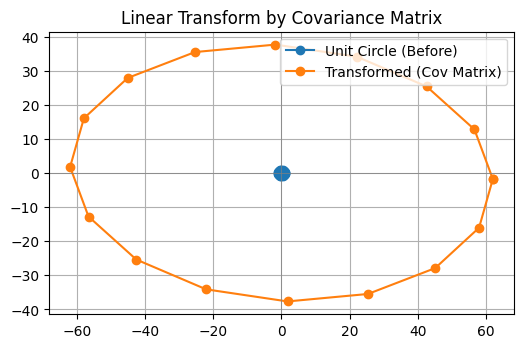

In [21]:
# 선형 변환 시각화
visualize_covariance_transform(cov_matrix)
